## Installing and Importing Packages 

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!pip install stable-baselines3[extra] protobuf==3.20.*

In [3]:
!pip install mss pydirectinput pytesseract

In [288]:
from mss import mss
import pydirectinput
import cv2
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from matplotlib import pyplot as plt
import time
import gymnasium as gym
from gymnasium import Env
from gymnasium.spaces import Box, Discrete 

## Creating the Environment 

In [308]:
class WebGame(Env):
    
    def __init__(self):
        super().__init__()
        self.observation_space = Box(low=0, high=255, shape=(1, 83, 100), dtype=np.uint8)
        self.action_space = Discrete(2)
        
        self.cap = mss()
        self.game_location = {"top": 1000, "left": 500, "width": 600, "height": 500}
        self.done_location = {"top": 710, "left": 1100, "width": 700, "height": 70}
    
    def step(self, action):
        action_dict = { 0: "space", 1: "no_op"}
        
        if action != 1:
            pydirectinput.press(action_dict[action])
            
        done, done_cap = self.get_done()
        new_observation = self.get_observation()
        reward = 1
        info = {}
        
        return new_observation, reward, done, info
    
    def render(self):
        cv2.imshow("Game", np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitKey(1) & 0xFF == ord("q"):
            self.close()
    
    def reset(self):
        time.sleep(1)
        pydirectinput.click(x=150, y=150)
        pydirectinput.press("space")
        return self.get_observation()
    
    def close(self):
        cv2.destroyAllWindows()
    
    def get_observation(self):
        screen_cap = np.array(self.cap.grab(self.game_location))[:,:,:3]
        gray_scale = cv2.cvtColor(screen_cap, cv2.COLOR_BGR2GRAY)
        pic_resized = cv2.resize(gray_scale, (100, 83))
        channel = np.reshape(pic_resized, (1, 83, 100))
        return channel
    
    def get_done(self):
        done_screen_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        done_strings = ['GAME', 'GAHE', 'GANH']
        done = False
        res = pytesseract.image_to_string(done_screen_cap)[:4]
        if res in done_strings:
            done = True
        return done, done_screen_cap
    

In [309]:
env = WebGame()

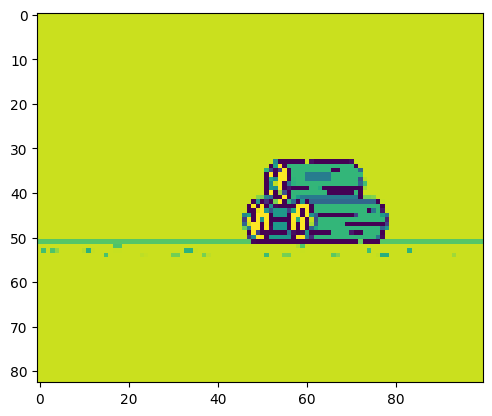

In [231]:
plt.imshow(env.get_observation()[0])

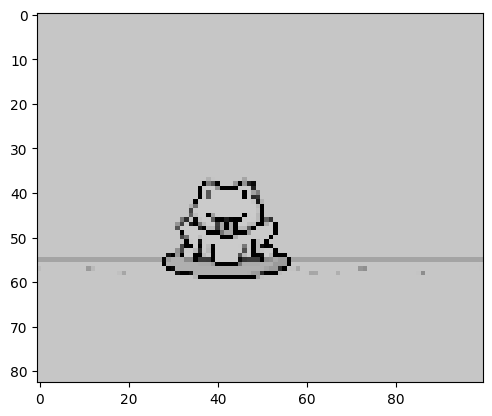

In [215]:
plt.imshow(cv2.cvtColor(env.get_observation()[0], cv2.COLOR_BGR2RGB))